# Lecture 09 Submission Pranav

# 1 Answer

Drawing the computation graph for the given equation and writing the derivatives for each

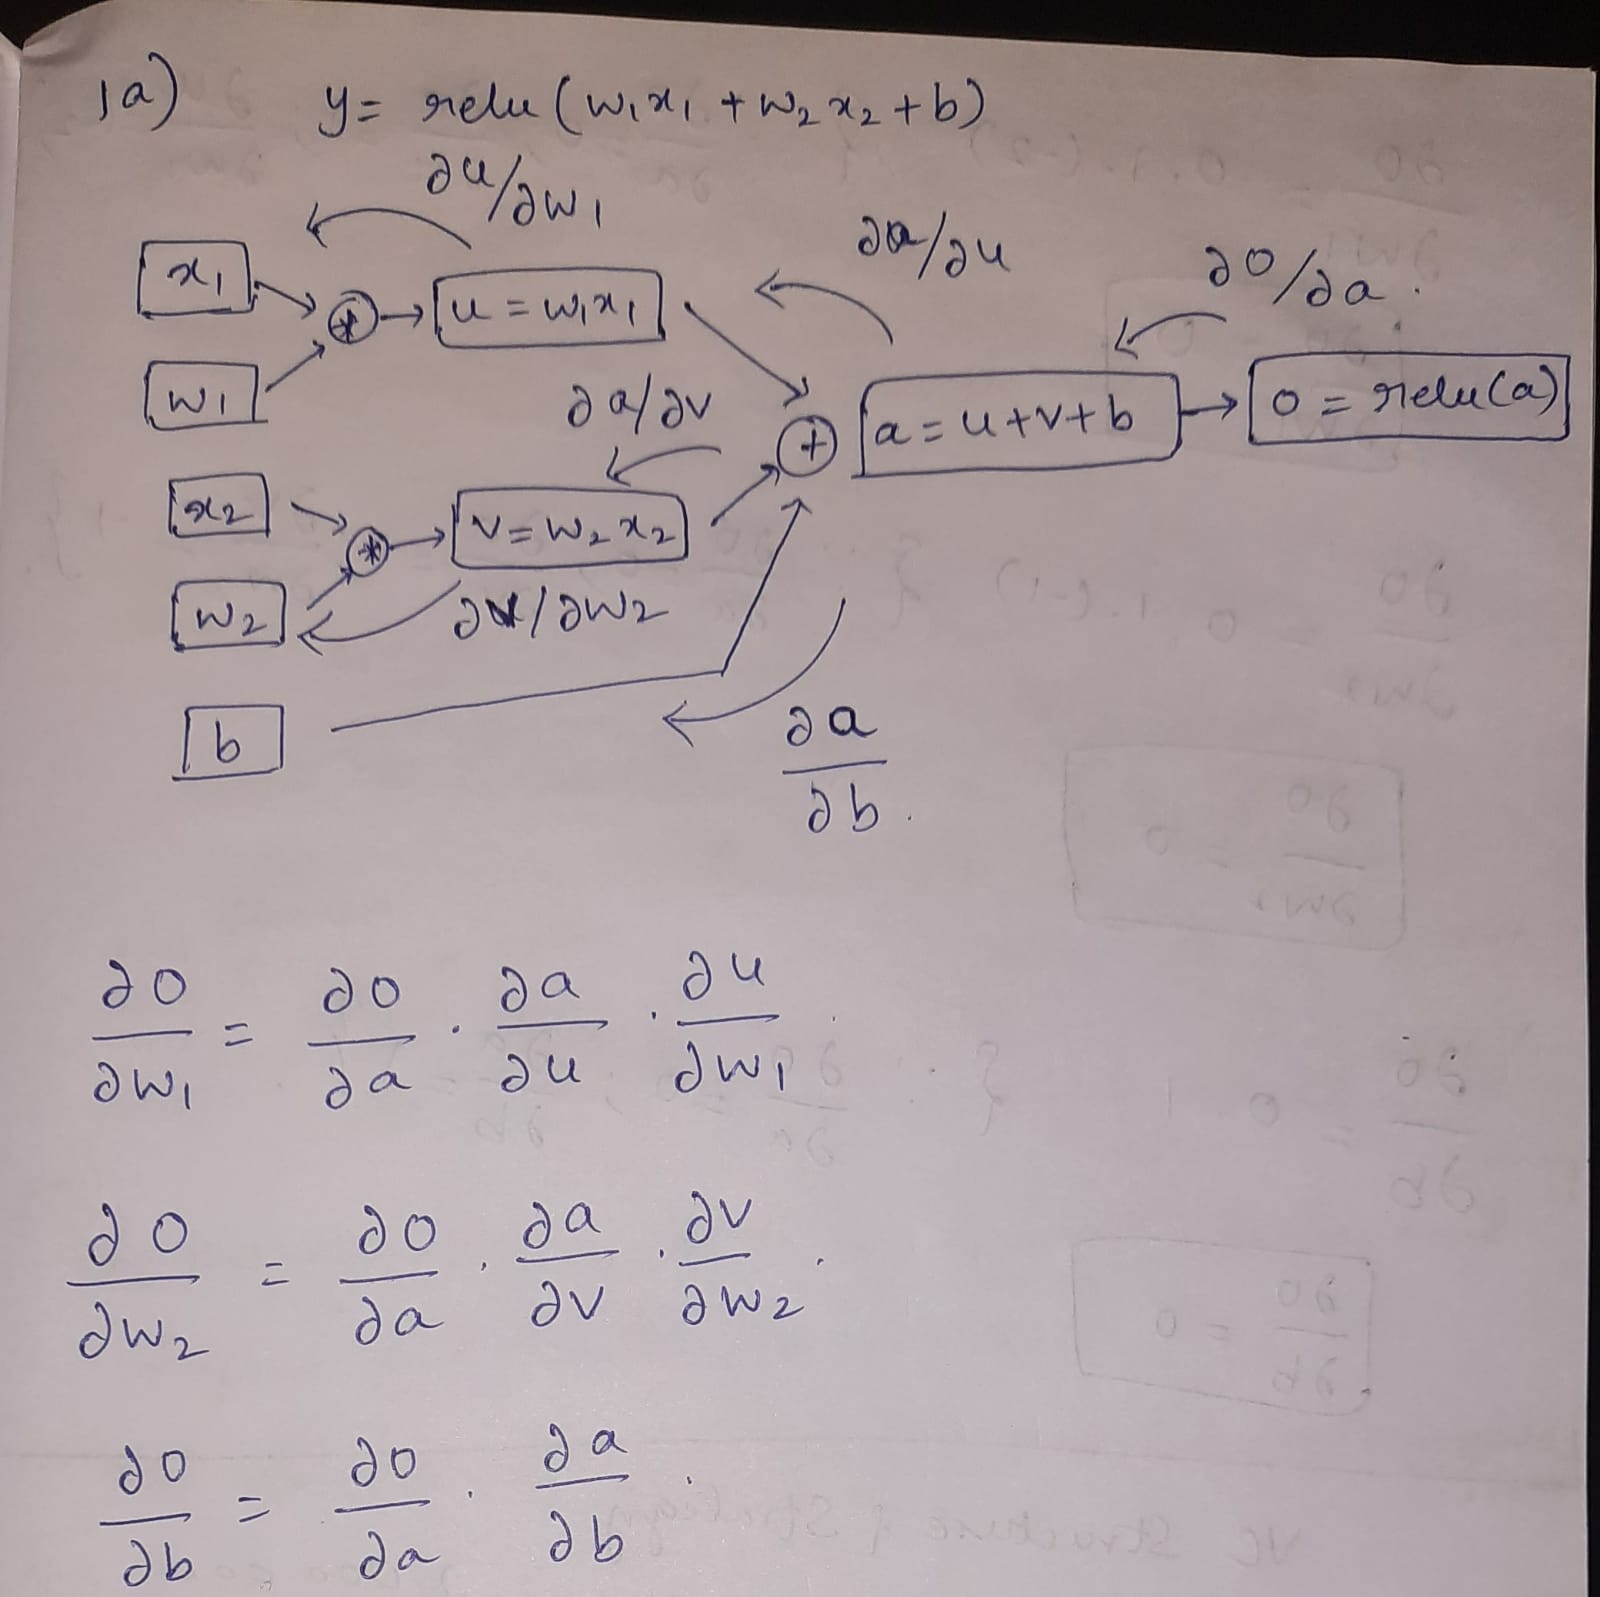

1b - Substituting the given values into the graph and then using the above derivied gradients to compute values

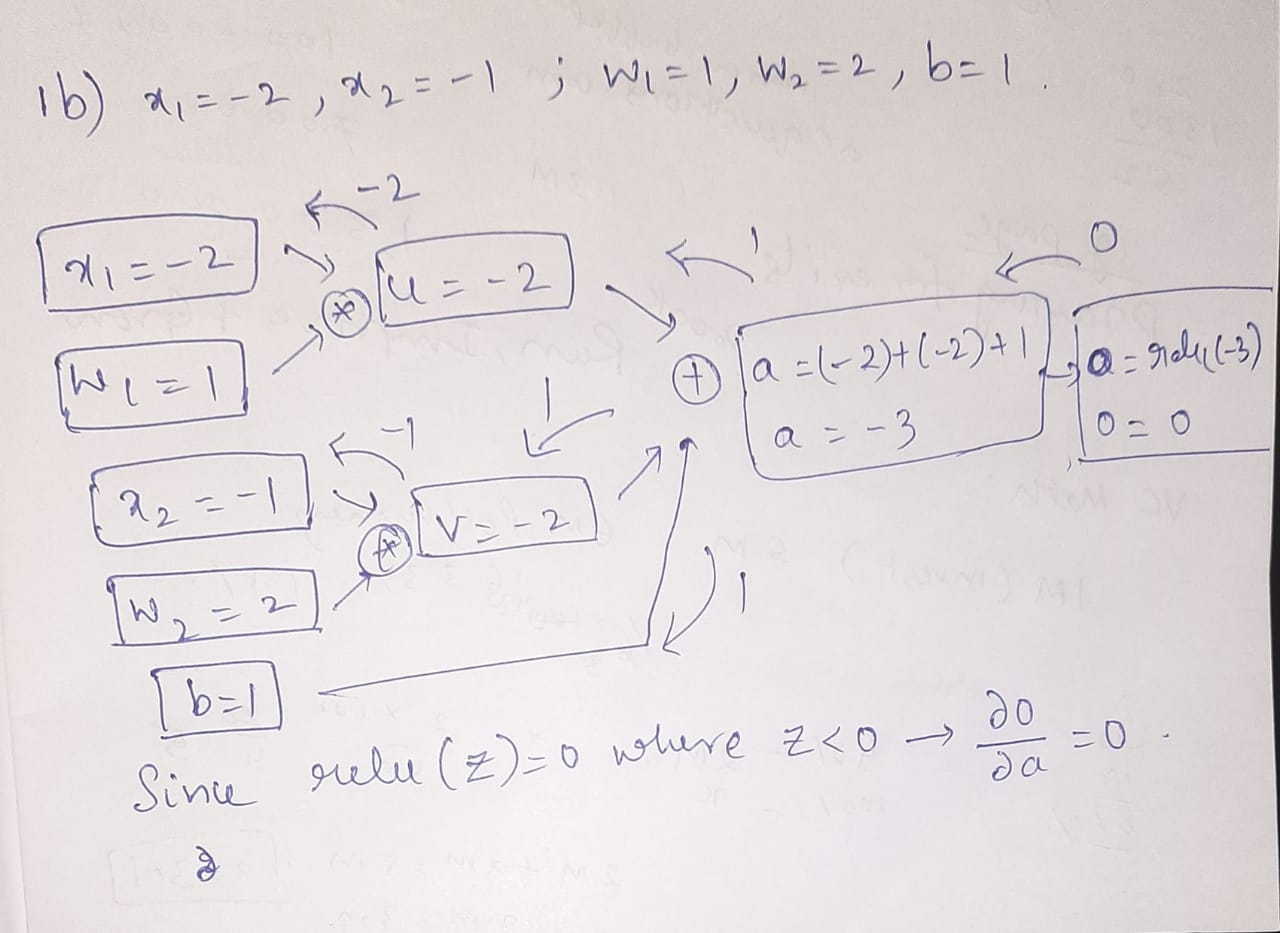

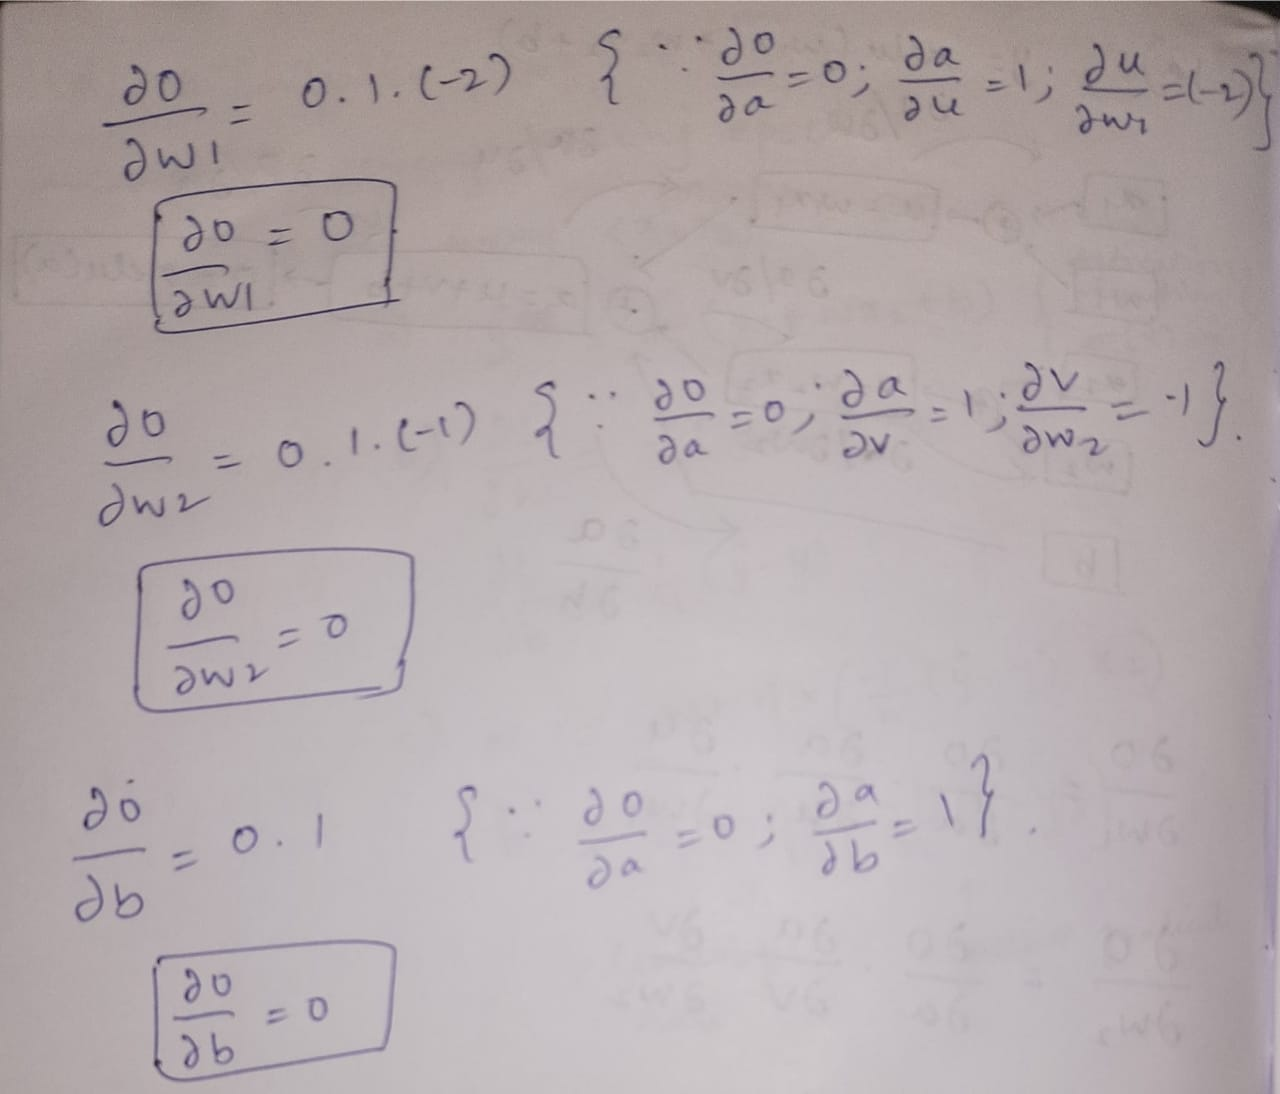

# 2 Answer

In [ ]:
import torch
from torch.autograd import grad
import torch.nn.functional as F
from torch.nn import ReLU

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [ ]:
df = pd.read_csv('./linreg-data.csv', index_col=0)
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [ ]:
# Assign features and target

X = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float) + 144

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

## Computing gradients manually

Here I've taken X as an n x 2 matrix and initialised the weights and biases accordingly as well, I've added an extra relu function to simulate the model.

However since we added 144 to y tensor and all values are positive as well as the derivative of relu for positive values is 1, I just calculated the loss and the derivatives accordingly

In [ ]:
class LinearRegression():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.rand(num_features, 1,
                                   dtype=torch.float)
        self.bias = torch.rand(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        relu = ReLU()
        return relu(activations).view(-1)

    def backward(self, x, yhat, y):

        grad_loss_yhat = 2*(yhat - y)

        grad_yhat_weights = x
        grad_yhat_bias = 1.

        grad_loss_weights =  torch.mm(grad_yhat_weights.t(),
                                         grad_loss_yhat.view(-1, 1)) / y.size(0)

        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [ ]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []
    for e in range(num_epochs):

        #### Compute outputs ####
        yhat = model.forward(x)

        #### Compute gradients ####
        negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

        #### Update weights ####
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        #### Logging ####
        yhat = model.forward(x) # not that this is a bit wasteful here
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [ ]:
model = LinearRegression(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001 | MSE: 18103.95508
Epoch: 002 | MSE: 14735.05957
Epoch: 003 | MSE: 12006.21191
Epoch: 004 | MSE: 9795.80957
Epoch: 005 | MSE: 8005.35596
Epoch: 006 | MSE: 6555.06592
Epoch: 007 | MSE: 5380.30811
Epoch: 008 | MSE: 4428.73877
Epoch: 009 | MSE: 3657.95361
Epoch: 010 | MSE: 3033.60547
Epoch: 011 | MSE: 2527.87402
Epoch: 012 | MSE: 2118.22339
Epoch: 013 | MSE: 1786.39905
Epoch: 014 | MSE: 1517.61621
Epoch: 015 | MSE: 1299.89771
Epoch: 016 | MSE: 1123.54150
Epoch: 017 | MSE: 980.68982
Epoch: 018 | MSE: 864.97723
Epoch: 019 | MSE: 771.24811
Epoch: 020 | MSE: 695.32556
Epoch: 021 | MSE: 633.82672
Epoch: 022 | MSE: 584.01141
Epoch: 023 | MSE: 543.65997
Epoch: 024 | MSE: 510.97461
Epoch: 025 | MSE: 484.49854
Epoch: 026 | MSE: 463.05264
Epoch: 027 | MSE: 445.68076
Epoch: 028 | MSE: 431.60916
Epoch: 029 | MSE: 420.21091
Epoch: 030 | MSE: 410.97812
Epoch: 031 | MSE: 403.49930
Epoch: 032 | MSE: 397.44125
Epoch: 033 | MSE: 392.53421
Epoch: 034 | MSE: 388.55914
Epoch: 035 | MSE: 385.33939
E

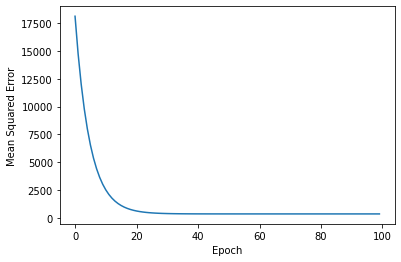

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print('Train MSE: %.5f' % loss(train_pred, y_train))
print('Test MSE: %.5f' % loss(test_pred, y_test))

Train MSE: 371.61038
Test MSE: 406.87973


In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[ 0.3623],
        [37.8791]])
Bias tensor([143.4497])


# 2 Linear Regression Semi Manual

## Computing the gradients semi manually

Here, I've defined the loss function and used the grad function from pytorch and used required_grad to calculate the gradients

I used the retain_graph=True as well to retain the graph while calculating derivatives of weights and then using that graph for biases

In [ ]:
class LinearRegression2():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.rand(num_features, 1,
                                   dtype=torch.float,
                                  requires_grad=True)
        self.bias = torch.rand(1, dtype=torch.float, requires_grad=True)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        return F.relu(activations).view(-1)

    def backward(self, x, yhat, y):

        grad_loss_yhat = 2*(yhat - y)

        grad_yhat_weights = x
        grad_yhat_bias = 1.

        # Chain rule: inner times outer
        grad_loss_weights =  torch.mm(grad_yhat_weights.t(),
                                         grad_loss_yhat.view(-1, 1)) / y.size(0)

        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

        # return negative gradient
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [ ]:
def loss_func(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []
    for e in range(num_epochs):

        yhat = model.forward(x)
        loss = loss_func(yhat, y)

        #### Compute gradients using the grad function of pytorch ####
        negative_grad_w = grad(loss, model.weights, retain_graph=True)[0] * (-1)
        negative_grad_b = grad(loss, model.bias)[0] * (-1)

        model.weights = model.weights + learning_rate * negative_grad_w
        model.bias = model.bias + learning_rate * negative_grad_b

        #### Logging ####
        with torch.no_grad():
          yhat = model.forward(x)
          curr_loss = loss_func(yhat, y)
          print('Epoch: %03d' % (e+1), end="")
          print(' | MSE: %.5f' % curr_loss)
          cost.append(curr_loss)

    return cost

In [ ]:
model = LinearRegression2(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001 | MSE: 17989.27930
Epoch: 002 | MSE: 14642.13867
Epoch: 003 | MSE: 11930.91797
Epoch: 004 | MSE: 9734.79883
Epoch: 005 | MSE: 7955.91992
Epoch: 006 | MSE: 6515.00586
Epoch: 007 | MSE: 5347.84814
Epoch: 008 | MSE: 4402.43604
Epoch: 009 | MSE: 3636.64038
Epoch: 010 | MSE: 3016.33545
Epoch: 011 | MSE: 2513.87988
Epoch: 012 | MSE: 2106.88403
Epoch: 013 | MSE: 1777.21155
Epoch: 014 | MSE: 1510.17163
Epoch: 015 | MSE: 1293.86523
Epoch: 016 | MSE: 1118.65344
Epoch: 017 | MSE: 976.72931
Epoch: 018 | MSE: 861.76831
Epoch: 019 | MSE: 768.64777
Epoch: 020 | MSE: 693.21851
Epoch: 021 | MSE: 632.11945
Epoch: 022 | MSE: 582.62793
Epoch: 023 | MSE: 542.53906
Epoch: 024 | MSE: 510.06628
Epoch: 025 | MSE: 483.76276
Epoch: 026 | MSE: 462.45633
Epoch: 027 | MSE: 445.19769
Epoch: 028 | MSE: 431.21771
Epoch: 029 | MSE: 419.89383
Epoch: 030 | MSE: 410.72113
Epoch: 031 | MSE: 403.29099
Epoch: 032 | MSE: 397.27249
Epoch: 033 | MSE: 392.39731
Epoch: 034 | MSE: 388.44833
Epoch: 035 | MSE: 385.24954
E

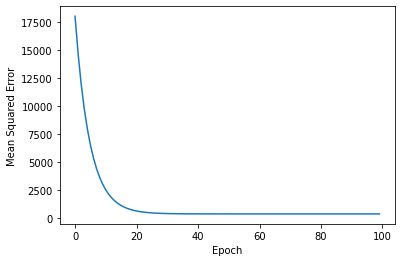

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print('Train MSE: %.5f' % loss(train_pred, y_train))
print('Test MSE: %.5f' % loss(test_pred, y_test))

Train MSE: 371.61032
Test MSE: 406.87982


In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[ 0.3623],
        [37.8791]], grad_fn=<AddBackward0>)
Bias tensor([143.4498], grad_fn=<AddBackward0>)


# 2 Linear Regression Automatic

Here I've removed backward function completely and used the optimiser function from pytorch and then just used to step and compute the gradients as well.

In [ ]:
class LinearRegression3(torch.nn.Module):
    def __init__(self, num_features):
        super(LinearRegression3, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)

    def forward(self, x):
        netinputs = self.linear(x)
        activations = netinputs
        return F.relu(activations).view(-1)


In [ ]:
def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []

    optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)

    for e in range(num_epochs):

        yhat = model.forward(x)
        loss = F.mse_loss(yhat, y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        #### Logging ####
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = F.mse_loss(yhat, y)
            print('Epoch: %03d' % (e+1), end="")
            print(' | MSE: %.5f' % curr_loss)
            cost.append(curr_loss)

    return cost

In [ ]:
model = LinearRegression3(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001 | MSE: 18315.29297
Epoch: 002 | MSE: 14911.81543
Epoch: 003 | MSE: 12149.74121
Epoch: 004 | MSE: 9912.19141
Epoch: 005 | MSE: 8099.72217
Epoch: 006 | MSE: 6631.58008
Epoch: 007 | MSE: 5442.34912
Epoch: 008 | MSE: 4479.04297
Epoch: 009 | MSE: 3698.74146
Epoch: 010 | MSE: 3066.67676
Epoch: 011 | MSE: 2554.68774
Epoch: 012 | MSE: 2139.96460
Epoch: 013 | MSE: 1804.02747
Epoch: 014 | MSE: 1531.90967
Epoch: 015 | MSE: 1311.48657
Epoch: 016 | MSE: 1132.93799
Epoch: 017 | MSE: 988.30878
Epoch: 018 | MSE: 871.15466
Epoch: 019 | MSE: 776.25659
Epoch: 020 | MSE: 699.38641
Epoch: 021 | MSE: 637.11926
Epoch: 022 | MSE: 586.68115
Epoch: 023 | MSE: 545.82477
Epoch: 024 | MSE: 512.72974
Epoch: 025 | MSE: 485.92166
Epoch: 026 | MSE: 464.20621
Epoch: 027 | MSE: 446.61624
Epoch: 028 | MSE: 432.36777
Epoch: 029 | MSE: 420.82593
Epoch: 030 | MSE: 411.47665
Epoch: 031 | MSE: 403.90338
Epoch: 032 | MSE: 397.76883
Epoch: 033 | MSE: 392.79965
Epoch: 034 | MSE: 388.77441
Epoch: 035 | MSE: 385.51382
E

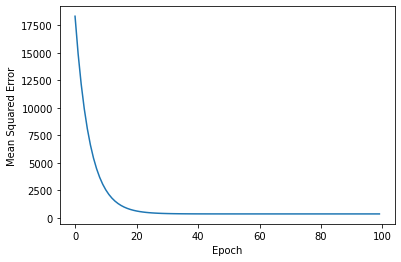

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print('Train MSE: %.5f' % F.mse_loss(train_pred, y_train))
print('Test MSE: %.5f' % F.mse_loss(test_pred, y_test))

Train MSE: 371.61035
Test MSE: 406.88037


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3622, 37.8791]], requires_grad=True), Parameter containing:
 tensor([143.4497], requires_grad=True)]

## 3 Answer

## Writing the automatic version using the sequential class and computing the loss and showing it is no different

In [ ]:
class LinearRegressionSequential(torch.nn.Module):
    def __init__(self, num_features):
        super(LinearRegressionSequential, self).__init__()

        self.my_network = torch.nn.Sequential(
            torch.nn.Linear(num_features, 1),
            torch.nn.ReLU()
        )


    def forward(self, x):
        netinputs = self.my_network(x)
        activations = netinputs
        return activations.view(-1)


In [ ]:
def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []

    optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)

    for e in range(num_epochs):

        yhat = model.forward(x)
        loss = F.mse_loss(yhat, y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        #### Logging ####
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = F.mse_loss(yhat, y)
            print('Epoch: %03d' % (e+1), end="")
            print(' | MSE: %.5f' % curr_loss)
            cost.append(curr_loss)

    return cost

In [ ]:
model = LinearRegressionSequential(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001 | MSE: 20488.75781
Epoch: 002 | MSE: 16986.41211
Epoch: 003 | MSE: 13830.63574
Epoch: 004 | MSE: 11274.26953
Epoch: 005 | MSE: 9203.45898
Epoch: 006 | MSE: 7525.97559
Epoch: 007 | MSE: 6167.10986
Epoch: 008 | MSE: 5066.34521
Epoch: 009 | MSE: 4174.65527
Epoch: 010 | MSE: 3452.33032
Epoch: 011 | MSE: 2867.20117
Epoch: 012 | MSE: 2393.20850
Epoch: 013 | MSE: 2009.24353
Epoch: 014 | MSE: 1698.20642
Epoch: 015 | MSE: 1446.24585
Epoch: 016 | MSE: 1242.14075
Epoch: 017 | MSE: 1076.80212
Epoch: 018 | MSE: 942.86633
Epoch: 019 | MSE: 834.36884
Epoch: 020 | MSE: 746.47845
Epoch: 021 | MSE: 675.28107
Epoch: 022 | MSE: 617.60626
Epoch: 023 | MSE: 570.88525
Epoch: 024 | MSE: 533.03815
Epoch: 025 | MSE: 502.37915
Epoch: 026 | MSE: 477.54321
Epoch: 027 | MSE: 457.42416
Epoch: 028 | MSE: 441.12634
Epoch: 029 | MSE: 427.92389
Epoch: 030 | MSE: 417.22876
Epoch: 031 | MSE: 408.56479
Epoch: 032 | MSE: 401.54648
Epoch: 033 | MSE: 395.86099
Epoch: 034 | MSE: 391.25531
Epoch: 035 | MSE: 387.52438

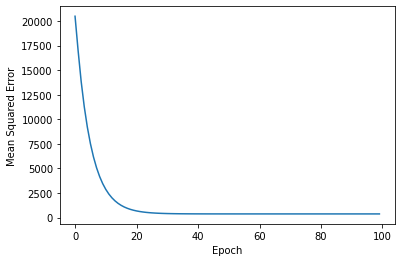

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print('Train MSE: %.5f' % F.mse_loss(train_pred, y_train))
print('Test MSE: %.5f' % F.mse_loss(test_pred, y_test))

Train MSE: 371.61035
Test MSE: 406.87943


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3621, 37.8788]], requires_grad=True), Parameter containing:
 tensor([143.4495], requires_grad=True)]

Here we can see that the loss is same as the one for automatic gradients as well as the model parameters are identical to the parameters in the automatic gradient method, also the MSE for train and test set are same as the above model